In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

Load in data and select feature set

In [30]:
df = pd.read_csv("all_downloaded_data.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.iloc[:, 0:10]
df = df.drop_duplicates()
print(df.head())

train = df.iloc[0:40000, :]
test = df.iloc[40000:, :]

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.375   0.294    8    -8.751     1       0.0329        0.9280   
1         0.950   0.803    1    -4.195     1       0.1510        0.1450   
2         0.758   0.501    0    -7.051     1       0.0589        0.2520   
3         0.534   0.749    6    -5.562     0       0.0749        0.0776   
4         0.674   0.744   11    -5.196     1       0.2740        0.0238   

   instrumentalness  liveness  valence  
0          0.000000    0.1900    0.125  
1          0.000000    0.0748    0.860  
2          0.000000    0.1910    0.397  
3          0.000001    0.0906    0.671  
4          0.000000    0.3300    0.624  


Find optimal number of clusters

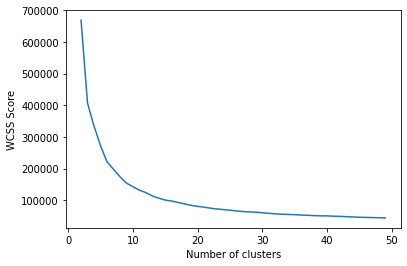

In [45]:
score=[]

iter = range(2,50)
for i in range(2,50): 
    clust = i
    curr_model = KMeans(init="random", n_clusters=clust, n_init=10, max_iter=300).fit(train)
    
    score.append(curr_model.inertia_)

plt.plot(iter, score)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Score')
plt.show()

In [46]:
kmeans = KMeans(
     init="random",
     n_clusters=13,
     n_init=10,
     max_iter=300,
     random_state=1
)

In [47]:
model = kmeans.fit(train)

In [49]:
preds = model.predict(test)
keys = test.loc[:, "key"]

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
flat_data = tsne.fit_transform(test)
projection = pd.DataFrame(columns=['x', 'y'], data=flat_data)
projection['keys'] = keys
projection['cluster'] = preds

In [53]:
import plotly.express as px
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'keys'])
fig.show()

Get specific songs based on ID (need a Spotify developer's account and authentication for this)

In [55]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [56]:
#be able to input a track name 
#dictionary in "Analyzed fetched data" to go to uri
#find the uri in the clustering find closest one by distance?
#find the closest one uri -> get track name
#output track name